In [697]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from numpy import *

In [519]:
class datasetgenerator:
    def __init__(self,m,k,eps): 
        self.m = m
        self.k = k
        self.train_arr = []
        self.labels = []
        self.eps = eps
        self.last = []
        for _ in range (self.m):
            vector = []
            for _ in range(self.k-1):
                vector.append(self.random())
            vector.append(self.compute_xk())
            self.train_arr.append(np.array(vector))
            xk = vector[-1]
            #####
            self.last.append(xk)
            #####
            if xk>0:
                self.labels.append(1)
            else:
                self.labels.append(-1)
                
        self.labels = np.asarray(self.labels)
    
    def random(self):
        return np.random.normal(0,1)
    def expdis(self):
        return np.random.exponential(1)
    def compute_xk(self):
        D = self.expdis()
        ans = 0.0
        if rd.random()>0.5:
            ans = D + self.eps
        else:
            ans = -(D+self.eps)
        return ans

In [892]:
class Perceptron:
    def __init__(self,k,num_iter,learning_rate):
        self.num_iter = num_iter
        self.learning_rate = learning_rate
        self.weights = np.zeros(k+1)
        self.counts = 0 
        
    def predict(self,inputarr):
        summation = np.dot(inputarr.T,self.weights[1:]) + self.weights[0]
        if summation >= 0:
            return 1
        else:
            return -1
        
    def suma(self,inputarr):
        return np.dot(inputarr.T,self.weights[1:]) + self.weights[0]
    
    def check(self,arr_inputs,labels):
        ans = True
        for arr,tag in zip(arr_inputs,labels):
            yesorno = self.predict(arr)
            if yesorno != tag:
                ans = False 
                break
        return ans
    
    def train(self,arr_inputs,labels):
        for _ in range(self.num_iter):
            ##############
            self.counts+=1
            if self.check(arr_inputs,labels) == True:
                print(self.counts)
            ##############
            for arr,tag in zip(arr_inputs,labels):
                prediction = self.predict(arr)
                if prediction != tag :
                    self.weights[1:] += self.learning_rate *tag*arr
                    self.weights[0] +=self.learning_rate * tag
                    
    def termi_train(self,arr_inputs,labels):
        count = 0
        for _ in range(self.num_iter):
            ##############
            self.counts+=1
            if self.check(arr_inputs,labels) == True:
#                 print(self.counts)
                break;
            ##############
            count += 1
            print("curretn count is ",count)
            for arr,tag in zip(arr_inputs,labels):
                prediction = self.predict(arr)
                if prediction != tag :
                    self.weights[1:] += self.learning_rate *tag*arr
                    self.weights[0] +=self.learning_rate * tag

In [909]:
d = datasetgenerator(100,20,1)   #first size of dataset,second: k, third: eps

In [910]:
classifier = Perceptron(20,10,0.1)#first k, second: iter_num,third:learning rate

In [824]:
classifier.termi_train(d.train_arr,d.labels)

7


In [674]:
ans = True
count = 0
for arr,tag in zip(d.train_arr,d.labels):
    yesorno = classifier.predict(arr)
    if yesorno != tag:
        count+=1
print("totoal misclassied",count)

totoal misclassied 0


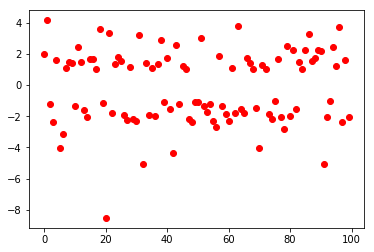

In [675]:
plt.plot( d.last,'ro')

In [620]:
classifier.weights

array([ 0.1       ,  0.05853444,  0.07404026, -0.07926902,  0.07157764,
       -0.14665417,  0.02992721,  0.19054558,  0.19450439,  0.00108496,
       -0.00313919,  0.14561911, -0.05221993, -0.10700358, -0.0267858 ,
        0.02994472,  0.01853864,  0.02342696,  0.14753566, -0.09450543,
        0.86469398])

In [911]:
points = []
outputs = []
color = []
x = []
for _ in range(1000000):
    point =  np.random.uniform(low=-20, high=20, size=(20,))
    x.append(point[-1])
    points.append(point)
    network_output = classifier.suma(point)
    outputs.append(network_output)
    if network_output > 0:
        color.append(1)
    else:
        color.append(-1)
# plt.scatter(*array(points).T, c=outputs, s=75)
# plt.show()

In [ ]:
plt.scatter(x,outputs,c = color,s=5)

# question(3)

In [838]:
avgiter = []
x_axis = []
loopnumber = 50
eps = 1.0
while eps > 0:
    tmpiter = 0.0
    for _ in range(loopnumber):
        d = datasetgenerator(100,20,eps)   #first size of dataset,second: k, third: eps
        classifier = Perceptron(20,100,1)#first k, second: iter_num,third:learning rate
        classifier.termi_train(d.train_arr,d.labels)
        tmpiter += classifier.counts
    total = tmpiter / loopnumber
    avgiter.append(total)
    x_axis.append(eps)
#     print("current eps is ",eps)
    eps-=0.01
    

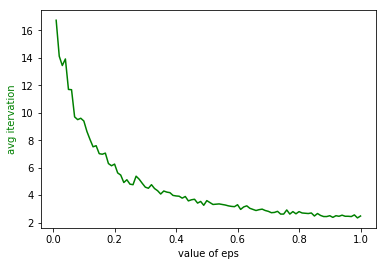

In [839]:
import numpy as np
import matplotlib.pyplot as plt

# plt.plot(x_axis, err_pred_history)
fig, ax1 = plt.subplots()

ax1.plot(x_axis,avgiter,'g-')
ax1.set_xlabel('value of eps')
ax1.set_ylabel('avg itervation',color = 'g')
plt.show()

# question(4)

# Fixing m = 100, k = 20

In [846]:
avgiter = []
x_axis = []
loopnumber = 50
k = 2
for k in range(2,41):
    tmpiter = 0.0
    for _ in range(loopnumber):
        d = datasetgenerator(100,k,1)   #first size of dataset,second: k, third: eps
        classifier = Perceptron(k,100,1)#first k, second: iter_num,third:learning rate
        classifier.termi_train(d.train_arr,d.labels)
        tmpiter += classifier.counts
    total = tmpiter / loopnumber
    avgiter.append(total)
    x_axis.append(k)
#     print("current eps is ",eps)
    

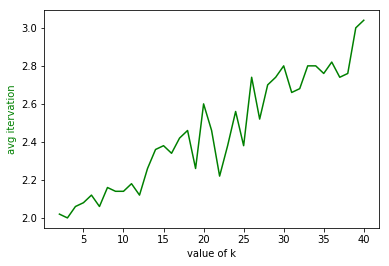

In [847]:
import numpy as np
import matplotlib.pyplot as plt

# plt.plot(x_axis, err_pred_history)
fig, ax1 = plt.subplots()

ax1.plot(x_axis,avgiter,'g-')
ax1.set_xlabel('value of k')
ax1.set_ylabel('avg itervation',color = 'g')
plt.show()

# Repeat for m = 1000

In [848]:
avgiter = []
x_axis = []
loopnumber = 50
k = 2
for k in range(2,41):
    tmpiter = 0.0
    for _ in range(loopnumber):
        d = datasetgenerator(1000,k,1)   #first size of dataset,second: k, third: eps
        classifier = Perceptron(k,100,1)#first k, second: iter_num,third:learning rate
        classifier.termi_train(d.train_arr,d.labels)
        tmpiter += classifier.counts
    total = tmpiter / loopnumber
    avgiter.append(total)
    x_axis.append(k)
#     print("current eps is ",eps)

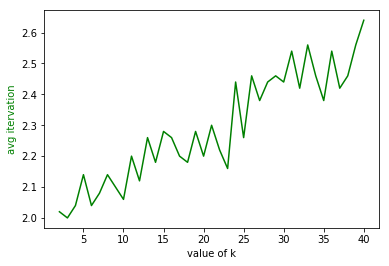

In [849]:
import numpy as np
import matplotlib.pyplot as plt

# plt.plot(x_axis, err_pred_history)
fig, ax1 = plt.subplots()

ax1.plot(x_axis,avgiter,'g-')
ax1.set_xlabel('value of k')
ax1.set_ylabel('avg itervation',color = 'g')
plt.show()

# Question(5)

In [870]:
class  datacreator:
    def __init__(self,m,k): 
        self.m = m
        self.k = k
        self.train_arr = []
        self.labels = []
        self.last = []
        for _ in range (self.m):
            vector = []
            for _ in range(self.k):
                vector.append(self.random())
            
            self.train_arr.append(np.array(vector))    
            ans = self.compute_Y(vector)
            if ans >= self.k:
                self.labels.append(1)
            else:
                self.labels.append(-1)
            
        self.labels = np.asarray(self.labels)
    
    def random(self):
        return np.random.normal(0,1)
    def expdis(self):
        return np.random.exponential(1)
    def compute_Y(self,vector):
        sum = 0.0
        for x in vector:
            sum+=x**2
        return sum

In [903]:
p = datacreator(100,2)

In [906]:
classifier = Perceptron(2,100,1)

In [907]:
classifier.termi_train(p.train_arr,p.labels)

curretn count is  1
curretn count is  2
curretn count is  3
curretn count is  4
curretn count is  5
curretn count is  6
curretn count is  7
curretn count is  8
curretn count is  9
curretn count is  10
curretn count is  11
curretn count is  12
curretn count is  13
curretn count is  14
curretn count is  15
curretn count is  16
curretn count is  17
curretn count is  18
curretn count is  19
curretn count is  20
curretn count is  21
curretn count is  22
curretn count is  23
curretn count is  24
curretn count is  25
curretn count is  26
curretn count is  27
curretn count is  28
curretn count is  29
curretn count is  30
curretn count is  31
curretn count is  32
curretn count is  33
curretn count is  34
curretn count is  35
curretn count is  36
curretn count is  37
curretn count is  38
curretn count is  39
curretn count is  40
curretn count is  41
curretn count is  42
curretn count is  43
curretn count is  44
curretn count is  45
curretn count is  46
curretn count is  47
curretn count is  48
c